<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<h1 style="text-align: center;">&nbsp;</h1>
<p>&nbsp;</p>
<h1 style="text-align: center;"><span style="font-weight: normal;">Fase 5:&nbsp;Evaluaci&oacute;n Final</span></h1>
<p>&nbsp;</p>
<h1 style="text-align: center;"><span style="font-weight: normal;">M&eacute;tricas de Evaluaci&oacute;n para Modelos de Aprendizaje Autom&aacute;tico Desarrollados en las Fases 3 y 4 del Curso Machine Learning</span></h1>
<h1 style="text-align: center;">&nbsp;</h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">Cristhian Le&oacute;nidas Cristancho Montero</span></h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">Darwin Ra&uacute;l Mercado Diaz</span></h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">Cristian Camilo Ortega Betancur</span></h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">Diego Alejandro Estrada V&eacute;lez</span></h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">Samuel Fernando S&aacute;nchez Cuervo</span></h1>
<p style="text-align: center;"><span style="font-weight: normal;">&nbsp;</span></p>
<h1 style="text-align: center;"><span style="font-weight: normal;">ECBTI &ndash; Universidad Nacional Abierta y a Distancia</span></h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">203008067A_1394: Machine Learning</span></h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">Edgar Andr&eacute;s Villab&oacute;n</span></h1>
<h1 style="text-align: center;"><span style="font-weight: normal;">6 de diciembre de 2023</span></h1>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

# Diego Estrada. Métricas: Análisis de Silueta, Recall y R2.score


## Modelo KNN

In [ ]:
import pandas as pd
import numpy as np

#Se carga la base de datos requerida. Esta ya contiene la fase de limpieza y preprocesamiento realizados en las fases 3 y 4
df = pd.read_csv('interrupciones_procesado.csv')
df_knn = df.copy()

In [ ]:
# Se crea el modelo de la fase 3 para la clasificación Knn.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Se codifican  las variables
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df_knn['Dirección'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_knn['Barrio'])

#Se dividen los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=30)

#Se crea el modelo
k = 1  # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#Se predicen valores
y_pred = knn.predict(X_test)

precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {precision:.2f}")


Precisión del modelo KNN: 0.47


### Matriz de Confusión

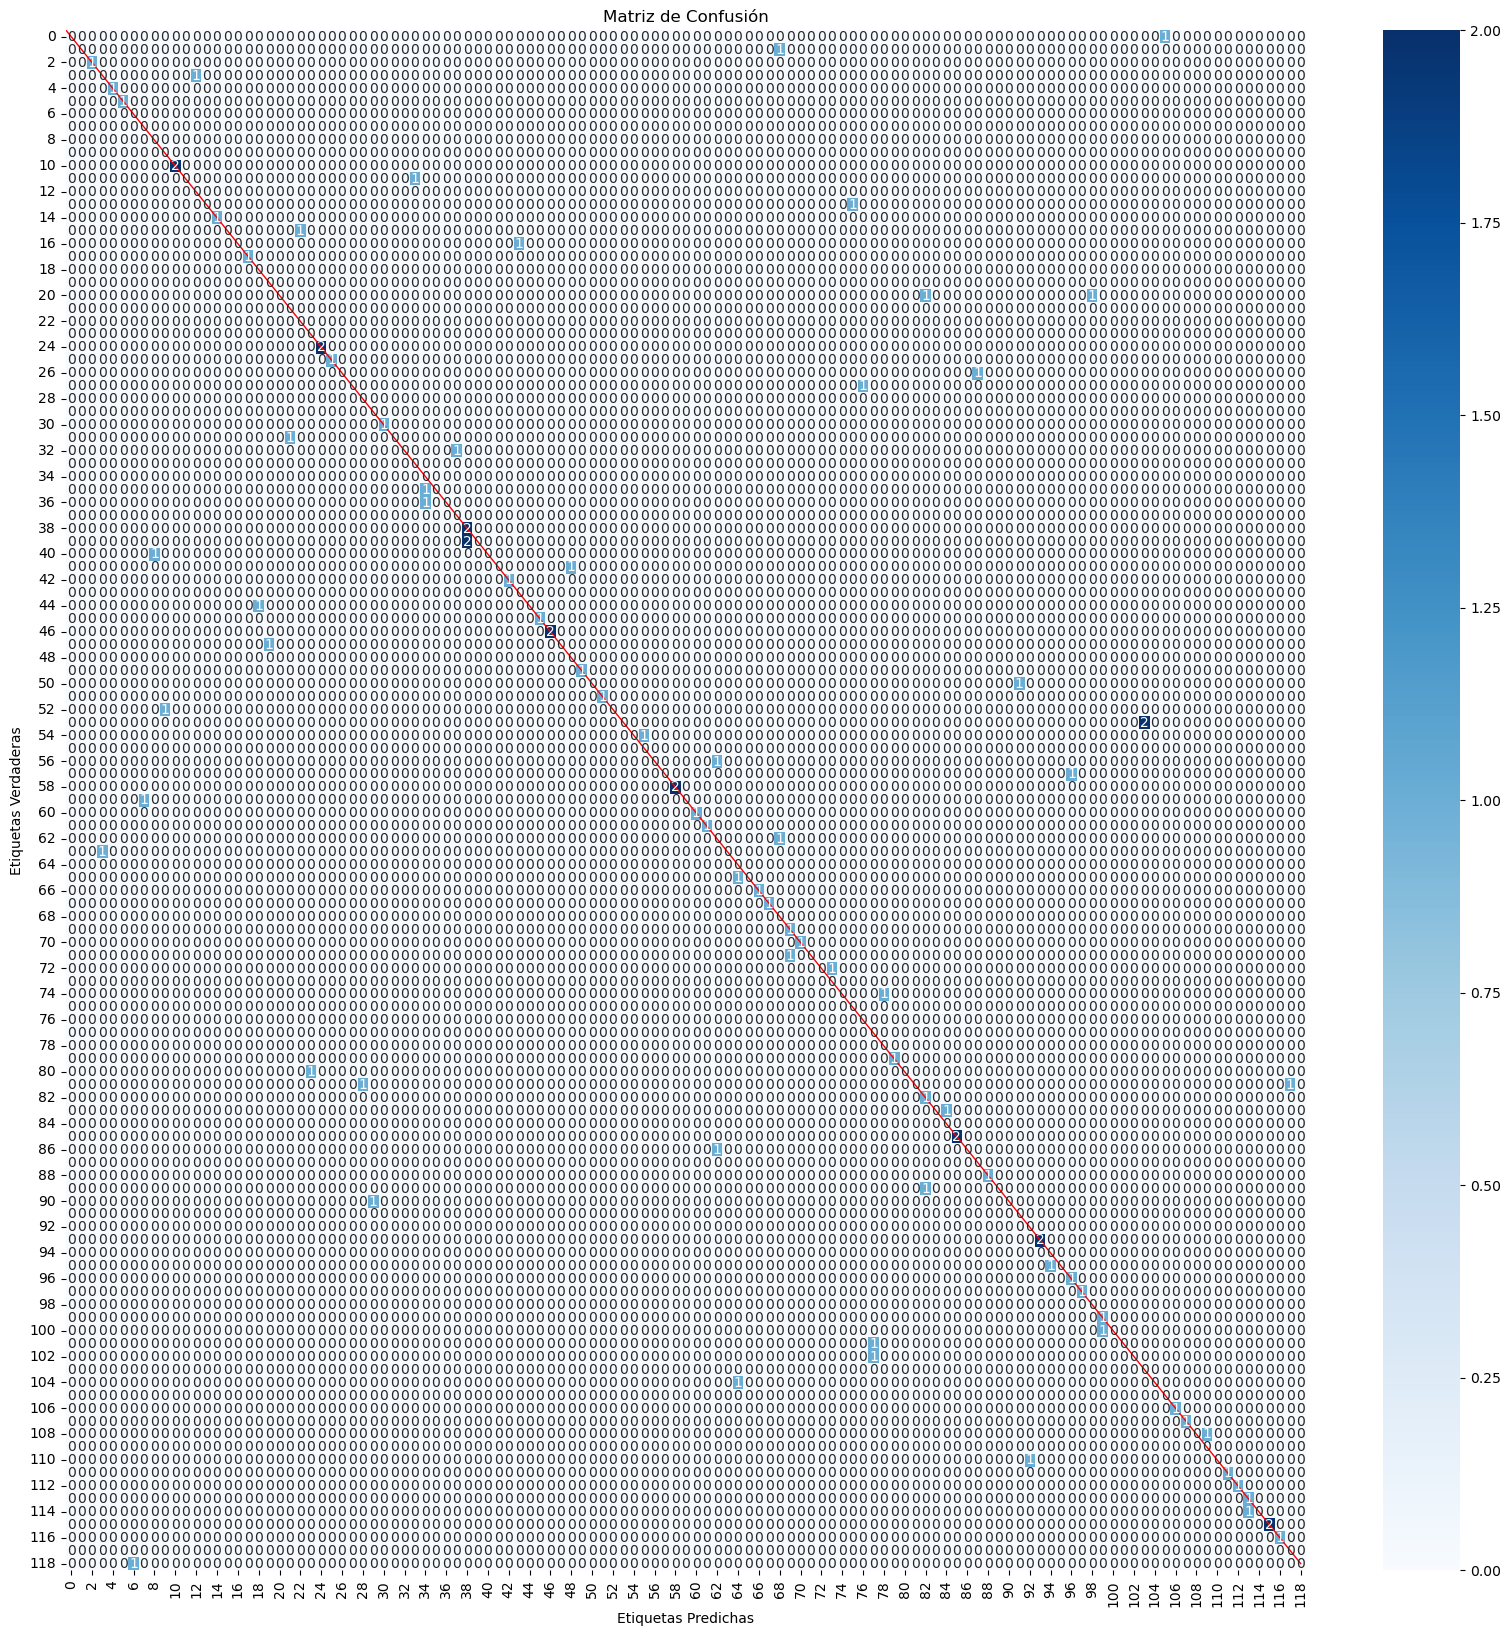

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(y_test, y_pred)

#mask = np.full_like(cm, True, dtype=bool)
#np.fill_diagonal(mask, False)

# se genera mapa de calor de la matriz de confusión
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de Confusión")
#plt.show()

# Añadiendo la línea diagonal. Los valores en la diagonal muestran los Barrios predichos correctamente.
plt.plot([-0.5, len(cm)-0.5], [-0.5, len(cm)-0.5], color='red', lw=1)

plt.show()

## Métrica para Evaluar el Modelo KNN: Recall

El recall, también conocido como sensibilidad o tasa de verdaderos positivos, es una métrica utilizada para evaluar modelos de clasificación. Se define como la proporción de casos positivos reales que fueron correctamente identificados por el modelo. En términos más formales, el recall se calcula como:

$$
\text{Recall} = \frac{\text{Verdaderos Positivos (VP)}}{\text{Verdaderos Positivos (VP)} + \text{Falsos Negativos (FN)}}
$$


los **Verdaderos Positivos (VP)** para una clase específica o barrio específico son los elementos que caen en la diagonal principal de la matriz de confusión para esa clase. En la matriz de confusión:

- Cada fila representa las instancias o barrios reales
- Cada columna representa las predicciones realizadas por el modelo.

Los elementos en la diagonal principal de la matriz de confusión representan las instancias donde la clase real y la clase predicha coinciden, es decir, donde el modelo ha hecho una predicción correcta. Por lo tanto, para un barrio específico, el elemento en la diagonal que corresponde a ese barrio representa el número de veces que el modelo predijo correctamente ese barrio (Verdaderos Positivos para ese barrio).

Los **Falsos Negativos** para un barrio específico ocurren cuando el modelo no predice que una instancia (ubicación) pertenece a ese barrio, pero en realidad, la instancia sí pertenece a ese barrio.

Por lo tanto, si se mira la fila para un barrio específico, todos los valores en esa fila, excepto el que está en la diagonal principal, sumarán los Falsos Negativos para dicho barrio. Esto representa todas las veces que el modelo debió haber predicho el barrio en cuestión, pero no lo hizo.



### Cálculo de Recall para Cada Clase

In [ ]:
recalls = []
for i in range(len(cm)):
    if np.sum(cm[i, :]) == 0:
        recalls.append(np.nan)
    else:
        recalls.append(cm[i, i] / np.sum(cm[i, :]))

print("Recall de cada clase:", recalls)


Recall de cada clase: [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, nan, nan, nan, nan, 1.0, 0.0, nan, 0.0, 1.0, 0.0, 0.0, 1.0, nan, nan, 0.0, nan, nan, nan, 1.0, 1.0, 0.0, 0.0, nan, nan, 1.0, 0.0, 0.0, nan, nan, 0.0, 0.0, nan, 1.0, 0.0, 0.0, 0.0, 1.0, nan, 0.0, 1.0, 1.0, 0.0, nan, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, nan, 0.0, 1.0, 1.0, nan, 1.0, 1.0, 0.0, 0.0, nan, 0.0, nan, nan, nan, nan, 1.0, 0.0, 0.0, 1.0, 0.0, nan, 1.0, 0.0, nan, 1.0, 0.0, 0.0, nan, nan, 1.0, nan, 0.0, 1.0, 1.0, nan, 1.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 1.0, 1.0, 0.0, nan, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, nan, 0.0]


In [ ]:
# contabilizar categorias

num_uno = sum(r == 1.0 for r in recalls)
num_cero = sum(r == 0.0 for r in recalls)
num_nans = sum(np.isnan(r) for r in recalls)

print(f"Recall de 1.0: {num_uno}, Recall de 0.0: {num_cero}, Recall de NaN: {num_nans}")


Recall de 1.0: 37, Recall de 0.0: 47, Recall de NaN: 35


**Recall de 1.0 en 37 Clases:** Esto indica que para 37 clases, el modelo ha predicho correctamente todas las instancias reales.

**Recall de 0.0 en 47 Clases:** Significa que para 47 clases, el modelo no ha identificado correctamente ninguna instancia real. Esto es preocupante, ya que sugiere que el modelo tiene dificultades para clasificar correctamente las instancias de estas clases. Esto podría deberse a varias razones, como la falta de representación adecuada de estas clases en los datos de entrenamiento, características insuficientes o inadecuadas para diferenciar estas clases, o un modelo que no se ajusta bien a la complejidad de los datos.

**Recall de NaN en 35 Clases:** Indica que no había ejemplos de estas clases en los datos de prueba o que las clases son difíciles de predecir con las características disponibles.

## Regresión Lineal

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Para el modelo lineal se carga un dataset procesado distinto, ya que durante la construcción del modelo de regresión en la fase 3, este dataset se expandió (varias entradas para las variables Dirección y Barrio están anidadas. Esto es, hay varias direcciones y barrios en una sola entrada separados por punto y coma) como estrategia para lograr un mejor ajuste de los datos.

In [ ]:
#Se carga el dataset
df_rl=pd.read_csv('interrupciones_procesado_regresion.csv')

#Se ajustan las variables de acuerdo a lo desarrollado en la fase 3
df_rl['Motivo'] = df_rl['Motivo'].astype('category')
df_rl['Fecha'] = pd.to_datetime(df_rl['Fecha'])
df_rl['Fecha'] = df_rl['Fecha'].dt.strftime('%Y-%m')
#Se seleccionan los datos requeridos para el caso
X = df_rl[['Motivo', 'Barrio', 'Fecha']]
y = df_rl[['Horas']]
#Se codifican las variables
codificador = OneHotEncoder(handle_unknown = 'ignore')
X_codificado = codificador.fit_transform(X)

#Se divide el conjunto en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_codificado, y, test_size=0.2, random_state=42)
#Se crea el modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Métrica para Evaluar el Modelo de Regresión Lineal: R2.score

### R2.score

**R-cuadrado (R²):** Representa la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes. Un valor de R² cercano a 1 indica que una gran proporción de la variabilidad en la variable de respuesta se puede explicar por las características en el modelo.

In [ ]:
# Se mide qué tan bueno es este modelo

r2 = r2_score(y_test, y_pred)

print(f'R-cuadrado: {r2: .2f}')

R-cuadrado:  0.27


Este resultado sugiere que el modelo no explica una gran parte de la variabilidad en la variable dependiente. Esto puede deberse a varias razones, como que las variables independientes seleccionadas no están muy correlacionadas con la variable dependiente, o que hay otros factores no incluidos en el modelo que influyen significativamente en la variable dependiente.

## Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
#Se carga el dataset
df_rlog = df.copy()
#Se ajustan las variables de acuerdo a lo realizado para la construcción del modelo en la fase 3
df_rlog = df_rlog[['Impacto', 'Circuito']]
df_rlog[df_rlog['Impacto'] == 'Medio'] = 'Alto'
df_rlog["Impacto"] = df_rlog["Impacto"].map({"Bajo": 0, "Alto": 1})
#Se definen las variables requeridas
Xlr = df_rlog[["Circuito"]]
ylr = df_rlog[["Impacto"]]

# Se codifican los datos
codificadorlr = OneHotEncoder()
Xlr_codificado = codificadorlr.fit_transform(Xlr)
#Se divide el conjunto en entrenamiento y prueba
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(Xlr_codificado, ylr, test_size=0.2, random_state=42)
#Se crea el modelo
model = LogisticRegression()
model.fit(Xlr_train, np.ravel(ylr_train))
#Se predicen valores
ylr_pred = model.predict(Xlr_test)

## Métrica para Evaluar el Modelo de Regresión Logística: Recall

In [ ]:
# Se emplea la función classificatio_report de scikit learn para determinar el recall
report = classification_report(ylr_test, ylr_pred)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       108
           1       0.74      0.76      0.75        83

    accuracy                           0.78       191
   macro avg       0.78      0.78      0.78       191
weighted avg       0.78      0.78      0.78       191



De acuerdo a los resultados del reporte se tiene que:

 - El recall para la clase 0 (Impacto Bajo) es del 0.80. Esto significa que de todos los casos que realmente son de la clase 0, el modelo fue capaz de identificar correctamente el 80% de ellos.

- El recall para la clase 1 (Impacto Alto) es del 0.76. Esto indica que de todos los casos que realmente pertenecen a la clase 1, el modelo identificó correctamente el 76% de ellos.



## Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import random


In [ ]:
#Se caraga el dataset
df_tree = df.copy()
df_tree = df_tree[['Motivo', 'Circuito', 'Municipio', 'Contratista']]

# Se filtran los motivos como fue indicado para el desarrollo del ejercicio en la fase 3:
df_tree = df_tree[(df_tree['Motivo'] == 'Mantenimiento') |
                  (df_tree['Motivo'] =='Lavado de tanque') | (df_tree['Motivo'] == 'Modernización')]


In [ ]:
# Se recrea el modelo desarrollado en la fase 3:
#Se definen las variables requeridas
X = df_tree[['Circuito', 'Municipio', 'Contratista']]
y = df_tree[["Motivo"]]

#Se codifican las variables categóricas
codificador = OneHotEncoder()
X_codificado = codificador.fit_transform(X)
X_codificado.shape

#Se separan los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_codificado, y, test_size=0.2, random_state=42)

#Se crea el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Métrica para Evaluar el Modelo de Árbol de Decisión: Recall

In [ ]:
#Se predicen valores y se emplea la función classification_report de scikit learn
y_pred = clf.predict(X_test)
reporte_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(reporte_clasificacion)


Informe de Clasificación:
                  precision    recall  f1-score   support

Lavado de tanque       0.98      1.00      0.99        59
   Mantenimiento       0.58      0.63      0.60        35
   Modernización       0.81      0.76      0.78        66

        accuracy                           0.82       160
       macro avg       0.79      0.80      0.79       160
    weighted avg       0.82      0.82      0.82       160



la métrica de recall (sensibilidad) revela varios aspectos importantes del rendimiento en el modelo de clasificación:

**Lavado de Tanque:**

- Recall: 1.00. Esto indica que el modelo ha identificado correctamente el 100% de los casos de 'Lavado de Tanque'. En otras palabras, no hubo falsos negativos para esta clase. Esto es ideal, especialmente si es crítico no perderse ningún caso de esta categoría.

**Mantenimiento:**

- Recall: 0.57. Aquí, el modelo identificó correctamente el 57% de los casos de 'Mantenimiento'. Esto significa que aproximadamente la mitad de las instancias reales de mantenimiento fueron correctamente clasificadas, mientras que la otra mitad fue pasada por alto (falsos negativos). Esta es una señal de que el modelo necesita mejoras en esta categoría, posiblemente debido a la falta de representatividad en los datos de entrenamiento o a la complejidad de diferenciar esta categoría de las demás.

**Modernización:**

- Recall: 0.77. El modelo fue capaz de identificar correctamente el 77% de los casos de 'Modernización'. Aunque es un rendimiento bueno, todavía hay margen para mejorar, ya que significa que aproximadamente el 23% de las instancias reales de modernización no fueron detectadas por el modelo.



## SVM

In [ ]:
#Se cargan las librerias adicionales requeridas:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer

#Se carga el dataset
df_svm = df.copy()

#Se ajustan las variables de acuerdo a lo desarrollado en la fase 4
df_svm['Instalación'] = df_svm['Instalación'].astype(str)

#Se definen las variables requeridas para el modelo
X = df_svm[['Impacto', 'Motivo', 'Circuito', 'Municipio', 'Contratista', 'Horas', 'Instalación']]
y = df_svm['Barrio']

#Se separan los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Se crea el pipeline

# Columnas para el transformador
variables_onehot = ['Impacto', 'Motivo', 'Circuito', 'Municipio', 'Contratista', 'Horas', 'Instalación']

# se crea el transformador
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# se crea el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, variables_onehot)
    ])

# se creea el pipeline final, se emplean los hiperparámetros indentificados en la fase 4 para mejorar el modelo
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(C=100, gamma='auto', kernel='rbf'))])

#Se crea el modelo
clf.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Impacto', 'Motivo',
                                                   'Circuito', 'Municipio',
                                                   'Contratista', 'Horas',
                                                   'Instalación'])])),
                ('classifier', SVC(C=100, gamma='auto'))])

## Métrica Para Evaluar el Modelo SVM: Recall

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Se hacen predicciones en el conjunto de prueba para poder construir la matriz de confusión
y_pred = clf.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

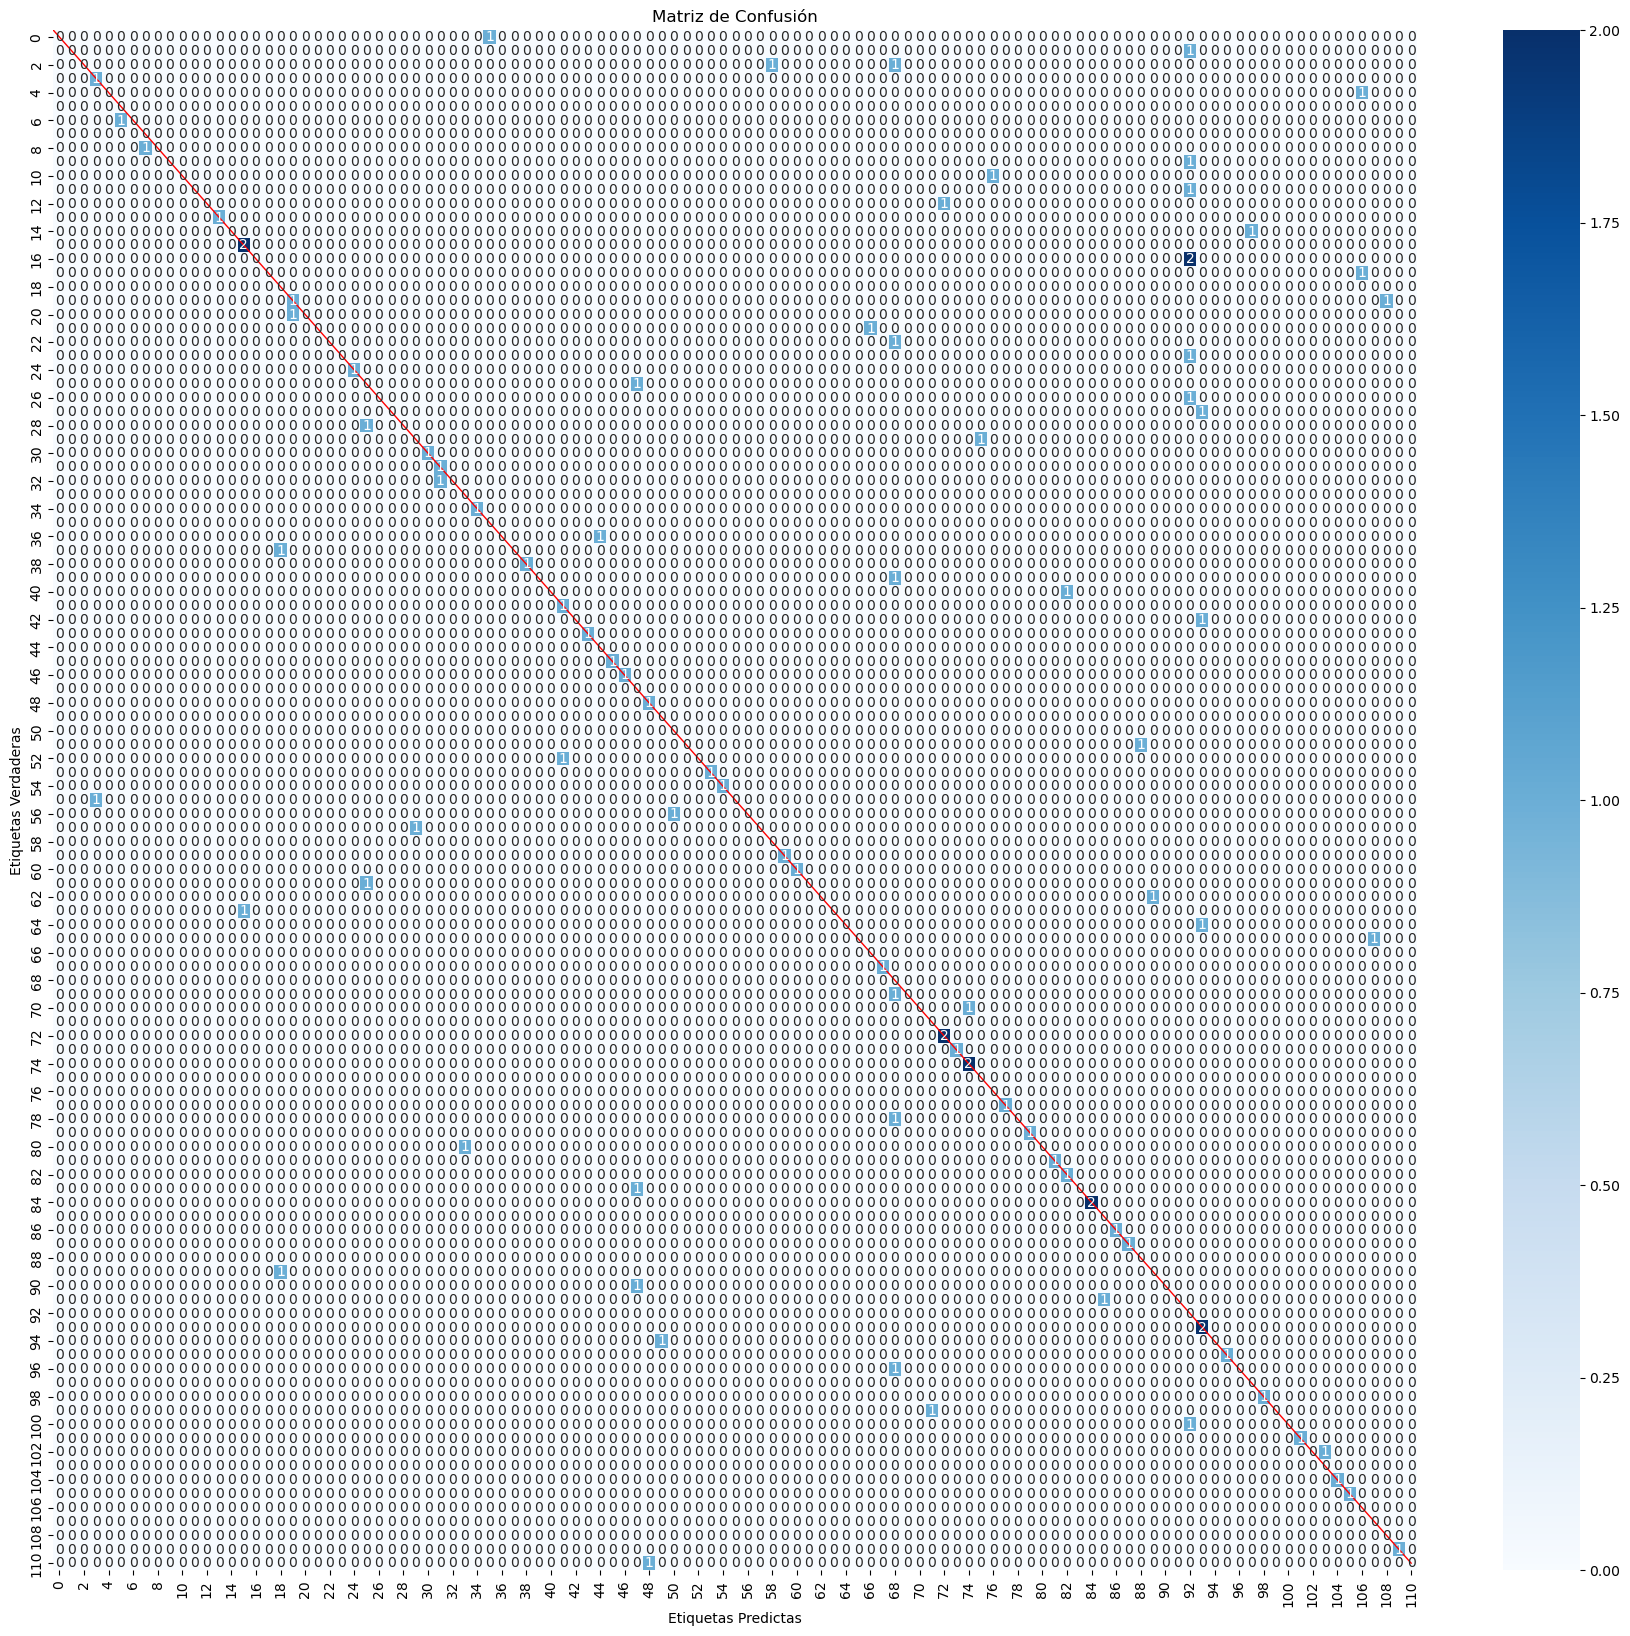

In [ ]:
# Genera un mapa de calor de la matriz de confusión
plt.figure(figsize=(22, 20))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Etiquetas Predictas")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de Confusión")

# Añadiendo la línea diagonal. Los valores en la diagonal muestran los Barrios predichos correctamente.
plt.plot([-0.5, len(cm)-0.5], [-0.5, len(cm)-0.5], color='red', lw=1)

plt.show()

In [ ]:
recalls = []
for i in range(len(cm)):
    if np.sum(cm[i, :]) == 0:
        recalls.append(np.nan)
    else:
        recalls.append(cm[i, i] / np.sum(cm[i, :]))

print("Recall de cada clase:", recalls)

Recall de cada clase: [0.0, 0.0, 0.0, 1.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, nan, 0.5, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, nan, 1.0, nan, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, nan, 1.0, 1.0, nan, 1.0, nan, nan, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, nan, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 1.0, nan, 0.0, 0.0, nan, 1.0, 1.0, 1.0, nan, nan, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, nan, 1.0, 1.0, nan, 0.0, 0.0, 0.0, nan, 1.0, 0.0, 1.0, 0.0, nan, 1.0, 0.0, 0.0, 1.0, 0.0, nan, 1.0, 1.0, nan, nan, nan, 1.0, 0.0]


In [ ]:
# contabilizar categorias

num_uno = sum(r == 1.0 for r in recalls)
num_cero = sum(r == 0.0 for r in recalls)
num_nans = sum(np.isnan(r) for r in recalls)

print(f"Recall de 1.0: {num_uno}, Recall de 0.0: {num_cero}, Recall de NaN: {num_nans}")

Recall de 1.0: 35, Recall de 0.0: 52, Recall de NaN: 23


**Recall de 1.0 en 35 Clases:** Esto indica que para 35 clases, el modelo ha predicho correctamente todas las instancias reales.

**Recall de 0.0 en 52 Clases:** Significa que para 52 clases, el modelo no ha identificado correctamente ninguna instancia real. Esto es preocupante como en el modelo KNN, ya que sugiere que el modelo tiene dificultades para clasificar correctamente las instancias de estas clases. Esto podría deberse a varias razones, como la falta de representación adecuada de estas clases en los datos de entrenamiento, características insuficientes o inadecuadas para diferenciar estas clases, o un modelo que no se ajusta bien a la complejidad de los datos.

**Recall de NaN en 23 Clases:** Indica que no había ejemplos de estas clases en los datos de prueba o que las clases son difíciles de predecir con las características disponibles.

## K-Means

In [ ]:
df_k = df.copy()

df_k = df_k[['Impacto', 'Motivo', 'Circuito', 'Municipio', 'Contratista', 'Horas', 'Instalación', 'Barrio']]

Se evalua el modelo Kmeans para el estudio de cuántas horas se suspende el servicio por circuito

In [ ]:
from sklearn.cluster import KMeans

# Se seleccionan las columnas categóricas
variables_categoricas = ['Circuito']
variables_numericas = ['Horas']

# Se crean los codificadores OneHotEncoder y StandardScaler
one_hot_encoder = OneHotEncoder()
scaler = StandardScaler()

# Se crea el transformador de columnas para transformar las características categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, variables_categoricas),
        ('num', scaler, variables_numericas)
    ]
)

# se ajustan y transforman los datos categóricos y numéricos. Se guarda en la variable X_procesado
X_procesado = preprocessor.fit_transform(df_k)


# Se inicia con un número de clusters igual a 3.  Posteriormente, se ajustará con el método del codo

k = 3

# se inicializa KMeans con el número de clusters

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Ajustamos el modelo
kmeans.fit(X_procesado)


KMeans(n_clusters=3, n_init=10, random_state=42)

## Métricas para Evaluar el Modelo Kmeans: Análisis de la Silueta

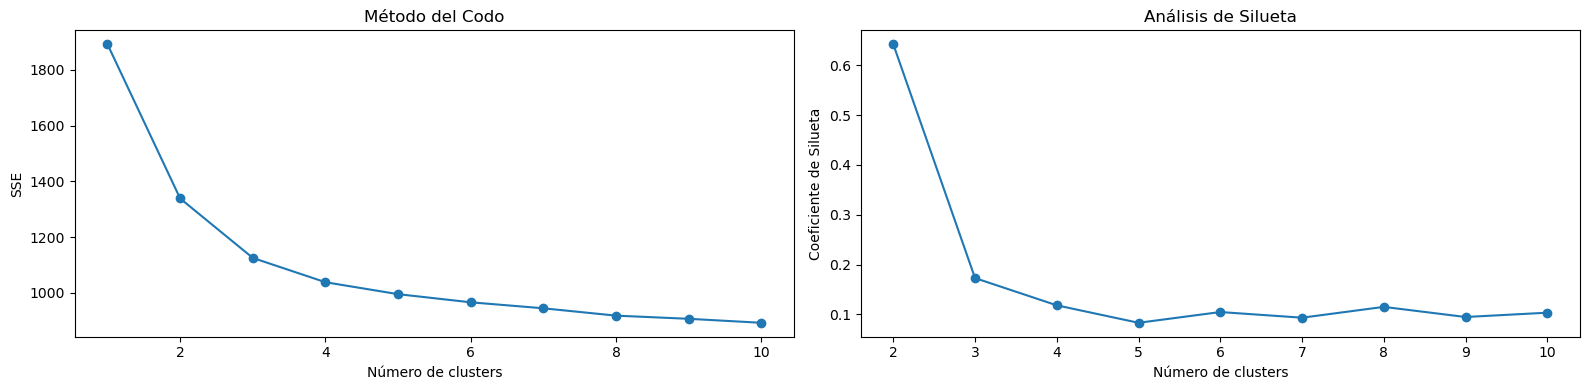

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
# Se calcula la suma de las distancias al cuadrado para un rango de números de clusters
sse = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_procesado)
    sse.append(kmeans.inertia_)
    # se calculan los puntajes de silueta solo para k > 1
    if k > 1:
        score = silhouette_score(X_procesado, kmeans.labels_)
        silhouette_scores.append(score)

# Configuración del subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Gráfico de Método del Codo
ax1.plot(range(1, 11), sse, marker='o')
ax1.set_title('Método del Codo')
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('SSE')

# Gráfico de Análisis de Silueta
ax2.plot(range(2, 11), silhouette_scores, marker='o')
ax2.set_title('Análisis de Silueta')
ax2.set_xlabel('Número de clusters')
ax2.set_ylabel('Coeficiente de Silueta')

# se muestras los gráfico gráficos
plt.tight_layout()
plt.show()### Interpretación Resultados Métodos del Codo y la Silueta

El método del codo, como el análisis de la silueta son métricas que se usan para ayudar a decidir el número óptimo de clusters en los que se debe separar un conjunto de datos.

Para el caso de la métrica de la silueta lo que se mide es qué tan bien emparejados están los datos en su cluster y qué tan mal emparejados están con los cluster vecinos. Los valores de la silueta están entre -1 y 1.

- Un valor de 1 indica que el punto esta en el cluster correcto.
- Un valor de -1 indica que el punto podría haber sido asignado al cluster incorrecto.
- Un valor cercano a 0 indica que la muestra esta cerca del límite de decisión entre dos clusters vecinos.

## Agglomerative Clustering

In [ ]:
df_agg = df.copy()

df_agg = df_agg[['Impacto', 'Motivo', 'Circuito', 'Municipio', 'Contratista', 'Horas', 'Instalación']]


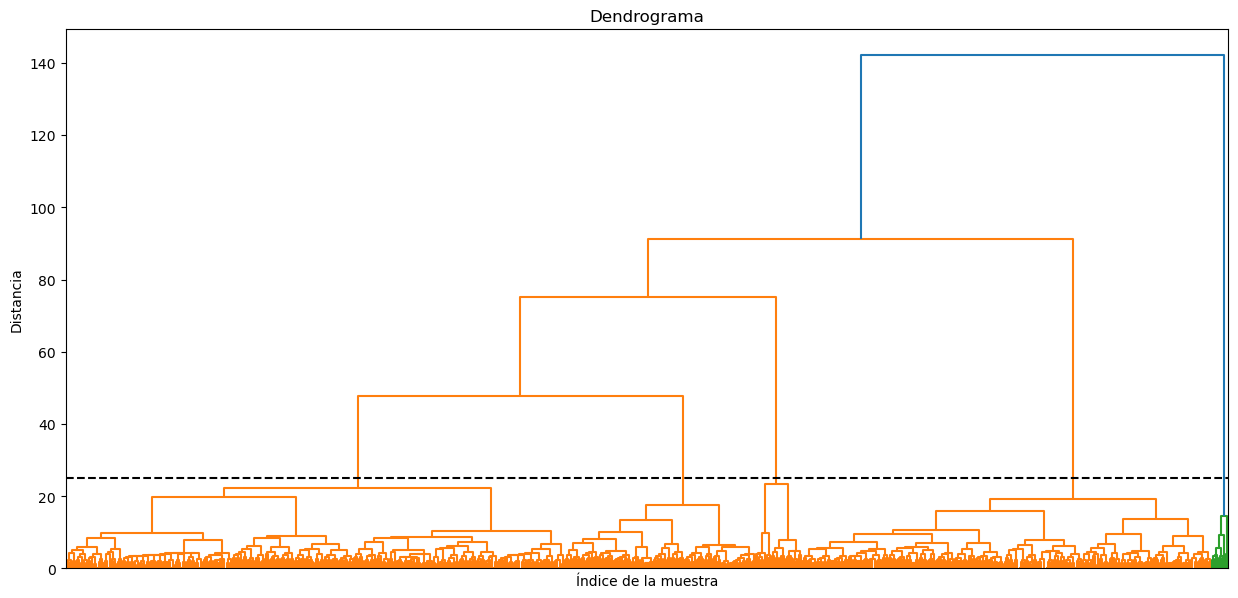

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Se codifican las variables categóricas

codificador = OneHotEncoder()
variables_codificadas = codificador.fit_transform(df_agg.drop('Horas', axis=1)).toarray()

# Crear un DataFrame con las variables categóricas codificadas
df_codificado = pd.DataFrame(variables_codificadas, columns=codificador.get_feature_names_out())

# Añadir la variable 'Horas' al DataFrame codificado
df_codificado['Horas'] = df_agg['Horas'].values

# Calcular la matriz de enlace utilizando el método de 'ward'
linked = linkage(df_codificado, method='ward')

# Crear el dendrograma para visualizar el número óptimo de clusters
plt.figure(figsize=(15, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    no_labels=True)

# Se crea una linea para ubicar en el dendograma y la decisión de número de clusters
plt.axhline(y=25, color='black', linestyle='--')

plt.title('Dendrograma')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()


De acuerdo a la descripción general de cómo se interpreta el dendograma, deben observarse los cambios de altura de las fusiones de abajo hacia arriba. Donde se aprecia un cambio grande de altura se sugiere un punto natural para separar los clusters.

Para este caso, de acuerdo a la altura de la linea horizontal propuesta, se interpreta que el número de clusters a emplear para este modelo deben ser 5.

## Métricas para Evaluar el Modelo Agglomerative Clustering: Análisis de la Silueta

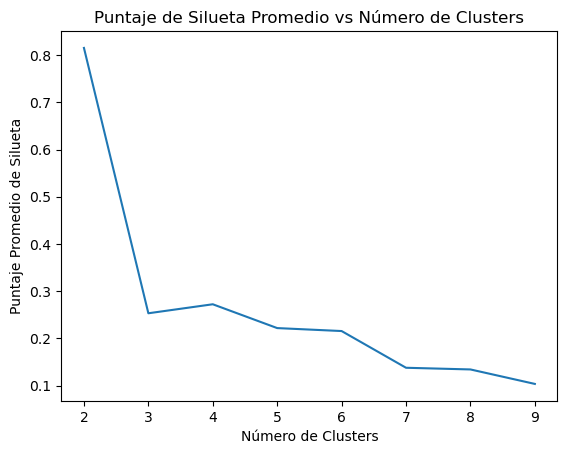

El número óptimo de clusters basado en el puntaje de silueta es: 2


In [ ]:
rango_clusters = range(2, 10)
silhouette_avg_scores = []

for num_clusters in rango_clusters:
    # Crear un modelo de clustering aglomerativo para cada número de clusters
    model = AgglomerativeClustering(n_clusters=num_clusters)

    # Ajustar el modelo y predecir los clusters
    cluster_labels = model.fit_predict(df_codificado)

    # Calcular el puntaje de silueta promedio para cada número de clusters
    silhouette_avg = silhouette_score(df_codificado, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    # Calcular los puntajes de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(df_codificado, cluster_labels)


# Graficar los puntajes promedios de silueta para cada número de clusters

plt.figure()
plt.plot(rango_clusters, silhouette_avg_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje Promedio de Silueta')
plt.title('Puntaje de Silueta Promedio vs Número de Clusters')
plt.show()

# El número óptimo de clusters es aquel que tiene el mayor puntaje promedio de silueta
n_clusters_optimo = rango_clusters[silhouette_avg_scores.index(max(silhouette_avg_scores))]
print(f'El número óptimo de clusters basado en el puntaje de silueta es: {n_clusters_optimo}')

De acuerdo a la gráfica del punto promedio de silueta, el número de cluster para los cuales los datos quedan "mejor" separados es 2.

# Cristhian Cristancho. Métricas: F1-Score, MAE e índice Davies-Bouldin

In [ ]:
# Importar bibliotecas necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Cargar datos excel original
df = pd.read_excel('Interrupciones Servicio Acueducto de EPM.xlsx', sheet_name=0, header=0, index_col=0)

# Cargar datos excel separado
df_s = pd.read_excel('Interrupciones Servicio Acueducto de EPM (Separado).xlsx', sheet_name=0, header=0, index_col=0)

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

## KNN

Modelo de aprendizaje automático que pueda aprender de las direcciones pertenecientes a los barrios donde se suspendió el servicio de acueducto, para predecir el barrio donde habrá una nueva suspensión del servicio de acueducto.

In [ ]:
# Preprocesamiento y división de datos
X_tfidf = TfidfVectorizer().fit_transform(df["direccion"])
y_encoded = LabelEncoder().fit_transform(df["barrio"])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=10)

# Búsqueda de hiperparámetros para KNN
best_k_knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': list(range(1, 10))}).fit(X_train, y_train).best_params_['n_neighbors']

# Entrenar y evaluar modelo KNN con ajuste para desequilibrio de clases
knn_classifier = KNeighborsClassifier(n_neighbors=best_k_knn, weights='distance').fit(X_train, y_train)
accuracy_knn = knn_classifier.score(X_test, y_test)

# Calcular y mostrar el resultado de la métrica
f1_knn = f1_score(y_test, knn_classifier.predict(X_test), average='weighted')
print(f"F1-Score KNN: {f1_knn:.4f}")

F1-Score KNN: 0.4902


**Análisis de Resultados:** El puntaje F1 de 0.4902 nos indica que el modelo KNN enfrenta dificultades para encontrar un buen equilibrio entre dos cosas importantes: precisión (cuánto acierta cuando predice) y exhaustividad (cuánto de lo que debería predecir logra atrapar). Hay varias razones posibles para este desafío:

- **Desequilibrio de Clases:** Puede que haya muchos más ejemplos de un tipo de situación en comparación con otro en nuestros datos, haciendo que el modelo se incline hacia la predicción del tipo más común.

- **Problemas con Situaciones Menos Comunes:** El modelo podría estar teniendo problemas para acertar en situaciones menos comunes. Si hay menos ejemplos de estas situaciones en nuestros datos, el modelo podría no estar aprendiendo lo suficiente sobre ellas.

- **Características que Necesitan Mejora:** Las cosas que el modelo está usando para aprender y hacer predicciones podrían necesitar ser más útiles. Tal vez haya formas de mejorar la información que le estamos dando al modelo para que aprenda mejor.

- **Ajustes en el Funcionamiento del Modelo:** Es posible que tengamos que cambiar algunos ajustes en la forma en que el modelo está trabajando para que se adapte mejor a nuestros datos. Estos ajustes pueden incluir cosas como la cantidad de "vecinos" que considera al hacer una predicción.

- **Problema Difícil de Predecir:** Prever suspensiones del servicio de acueducto puede ser complicado en sí mismo. Hay factores que son difíciles de entender o que nuestro modelo actual podría no estar capturando de manera efectiva.

**Propuesta Solución:** Al abordar el objetivo de predecir el barrio donde ocurrirá una nueva suspensión del servicio de acueducto, proponemos una mejora en el enfoque temporal del modelo. La idea es permitir que el modelo prediga patrones de suspensión por barrios y, a través de secuencias temporales, indique cuál podría ser el siguiente barrio afectado. La dificultad principal radica en las interrupciones imprevistas debido a mantenimientos extemporáneos o correctivos que pueden alterar la secuencia previsible.

En el caso de los mantenimientos programados, la predicción se vuelve más sencilla, ya que su planificación anticipada suele incluir información sobre las zonas afectadas. Sin embargo, la mejora clave reside en optimizar el modelo para hacer frente a correctivos o fallos en el servicio. Para lograr esto, proponemos definir variables específicas con fechas rigurosas y almacenarlas en una base de datos. Este enfoque permitirá que el modelo aprenda de manera más efectiva y descifre tendencias significativas, proporcionando resultados más precisos en la predicción de suspensiones del servicio.

---

## Regresión Lineal

Modelo de regresión lineal para predecir el número de horas que permanecerá suspendido el servicio de acueducto en Medellín en diciembre del 2022 a partir del número de horas suspendido anteriormente, motivo y barrios afectados.

In [ ]:
# Preprocesamiento de datos
df_s['mes y año del corte'] = df_s['fecha y hora inicio'].dt.strftime('%Y-%m')
df_s_med_dic = df_s[(df_s['municipio'] == 'medellin') & (df_s['mes y año del corte'].str.endswith("-12"))]

# Selección y preparación de datos
datos_lineal = df_s_med_dic[['impacto', 'circuito', 'motivo', 'barrio', 'horas', 'mes y año del corte']].copy()
datos_lineal['horas'] = datos_lineal['horas'].astype(float)
datos_lineal[['circuito', 'motivo', 'barrio', 'mes y año del corte']] = datos_lineal[['circuito', 'motivo', 'barrio', 'mes y año del corte']].astype('category')

# Codificación y división de datos
X = OneHotEncoder(handle_unknown='ignore').fit_transform(datos_lineal[['motivo', 'barrio', 'mes y año del corte']])
y = datos_lineal['horas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Entrenamiento del modelo
model = LinearRegression().fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Resultado de la métrica
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.3767689867427547


**Análisis de Resultados:** Un Mean Absolute Error (MAE) de 0.377 horas en el modelo de regresión lineal para predecir la duración de la suspensión del servicio de acueducto en Medellín durante diciembre de 2022 es un indicador altamente positivo. Este valor relativamente bajo señala que, en promedio, nuestras predicciones difieren en aproximadamente 0.377 horas de los valores reales. En el contexto de la predicción de la duración de la suspensión del servicio, donde incluso pequeñas discrepancias pueden tener impactos significativos, este MAE sugiere un nivel considerable de precisión en las estimaciones del modelo. Este resultado respalda la utilidad y efectividad del modelo de regresión lineal en cumplir su objetivo, proporcionando parametros valiosos para la planificación y gestión eficientes del servicio de acueducto en Medellín durante el período específico en cuestión.

**Propuesta Solución:** Este resultado respalda la utilidad y efectividad del modelo de regresión lineal para cumplir su objetivo principal. Proporciona parámetros valiosos que son fundamentales para la planificación y gestión eficientes del servicio de acueducto en Medellín durante el período específico en cuestión. La precisión demostrada por el modelo ofrece una base sólida para la toma de decisiones informadas y estratégicas, permitiendo a las autoridades y operadores del servicio mejorar la calidad y confiabilidad del suministro de agua en la ciudad.

___

## Regresión Logística

Modelo de regresión logística para predecir la probabilidad de que un circuito tenga una suspensión de alto o bajo impacto.

In [ ]:
# Preprocesamiento y selección de datos
datos_log = df_s[["circuito", "impacto"]]
datos_log = datos_log[datos_log['impacto'].isin(['alto', 'bajo'])]
datos_log['impacto'] = datos_log['impacto'].map({'bajo': 0, 'alto': 1})

# Selección de características y variable objetivo
X_log, y_log = datos_log[["circuito"]], datos_log["impacto"]

# Codificación y división de datos
X_log_encoded = OneHotEncoder().fit_transform(X_log)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log_encoded, y_log, test_size=0.2, random_state=10)

# Entrenamiento y evaluación del modelo
model_log = LogisticRegression().fit(X_log_train, y_log_train)
f1_log = f1_score(y_log_test, model_log.predict(X_log_test))

# Resultado de la métrica
print(f"F1-Score Regresión Logística: {f1_log:.2f}")

F1-Score Regresión Logística: 0.99


**Análisis de Resultados:** El modelo de regresión logística desarrollado para predecir la probabilidad de suspensión de alto o bajo impacto en circuitos ha arrojado un F1-Score de 0.99. Este valor refleja una combinación sólida de precisión y recall, indicando que el modelo logra identificar con precisión tanto los casos positivos como los negativos. La alta capacidad de clasificación sugiere que el modelo es una herramienta confiable y eficaz para la toma de decisiones en la gestión de eventos de suspensión. Aunque los resultados son prometedores, es importante contextualizarlos en el dominio específico del problema y considerar posibles sesgos o desafíos en los datos para una interpretación más completa. En general, el modelo demuestra un rendimiento excepcional en su capacidad predictiva.

**Propuesta Solución:** El modelo de regresión logística, con un sólido F1-Score de 0.99, ofrece una solución eficiente para prever y gestionar suspensiones en el servicio de acueducto. Al anticipar con precisión situaciones de alto y bajo impacto en circuitos específicos, el modelo proporciona una guía práctica para la toma de decisiones. Su capacidad para identificar patrones facilita una planificación más efectiva de mantenimientos, minimizando interrupciones. Contextualizado en el problema real, aborda sesgos y desafíos, mejorando la eficiencia operativa y la calidad del servicio de manera práctica y proactiva.
___

## Árbol de Decisión

Modelo de árbol de decisión para distinguir entre tres motivos de suspensión del servicio de acueducto (mantenimiento, modernización y lavado de tanque) usando las tres características: municipio, contratista y circuito.

In [ ]:
# Selección y filtrado de datos
df_t = df[["circuito", "motivo", "municipio", "nombre del contratista"]]
motivos_filtrados = ["mantenimiento", "modernización", "lavado de tanque"]
data_tree = df_t[df_t['motivo'].isin(motivos_filtrados)]

# LabelEncoder y codificación
data_tree_encoder = data_tree.copy()
data_tree_encoder[['circuito', 'municipio', 'nombre del contratista']] = data_tree_encoder[['circuito', 'municipio', 'nombre del contratista']].apply(LabelEncoder().fit_transform)

# División de datos
X_tree, y_tree = data_tree_encoder.drop('motivo', axis=1), data_tree_encoder['motivo']
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

# Entrenamiento y evaluación del modelo
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_tree_train, y_tree_train)
f1_tree = f1_score(y_tree_test, model_tree.predict(X_tree_test), average='weighted')

# Resultado de la métrica
print(f"F1-Score Árbol de Decisión: {f1_tree}")

F1-Score Árbol de Decisión: 0.9940667058617895


**Análisis de Resultados:** El análisis revela un valor interesante de 0.9941. Este puntaje refleja la capacidad del modelo para discernir de manera precisa entre los tres motivos de suspensión del servicio de acueducto, a saber, mantenimiento, modernización y lavado de tanque. La profundidad máxima limitada del árbol a 3 niveles sugiere que el modelo ha logrado una generalización efectiva sin caer en sobreajuste, manteniendo así su capacidad predictiva en datos no vistos.

**Propuesta Solución:** En términos de solución al problema, el modelo de árbol de decisión emerge como una herramienta valiosa para la toma de decisiones en la gestión de eventos de suspensión. Su capacidad para clasificar motivos con alta precisión permite a las autoridades de acueducto y contratistas anticipar y abordar de manera eficiente situaciones específicas. La aplicabilidad práctica del modelo se evidencia en la mejora de la planificación de recursos y la minimización de impactos en el servicio. Además, su interpretación intuitiva facilita la comprensión de los factores clave que influyen en la suspensión del servicio, brindando una base sólida para estrategias operativas más efectivas y una respuesta proactiva a los desafíos en la prestación del servicio de acueducto.

---

## Support Vector Machine

Automatice el proceso de interrupción del servicio de acueducto en función del circuito, motivo, municipio, horas, número de instalación, impacto y nombre del contratista. Para automatizar este proceso, se tiene el problema de identificar los barrios que son elegibles para la suspensión del servicio para poder dirigirse directamente a estos circuitos.

In [ ]:
# Seleccionar las columnas requeridas
columnas_svm = ['impacto', 'circuito', 'motivo', 'numero de instalacion', 'municipio', 'barrio', 'horas', 'nombre del contratista']
df_svm = df_s[columnas_svm].copy()

# Escalar las columnas numéricas y realizar codificación one-hot
numerical_columns = ['numero de instalacion', 'horas']
df_numeric = df_svm[numerical_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)
df_svm_scaled = pd.concat([df_svm.drop(columns=numerical_columns), df_scaled], axis=1)
df_svm_scaled = pd.get_dummies(df_svm_scaled, columns=['impacto', 'circuito', 'motivo', 'municipio', 'nombre del contratista'], prefix=['impacto', 'circuito', 'motivo', 'municipio', 'nombre del contratista'])

# Dividir conjunto de datos y extracción de variables objetivo
y = df_svm_scaled['barrio']
X = df_svm_scaled.drop('barrio', axis=1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificación de etiquetas
y_combined = pd.concat([y_train, y_test])
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)
y_train_encoded = y_combined_encoded[:len(y_train)]
y_test_encoded = y_combined_encoded[len(y_train):]

# Eliminar filas nulas en conjuntos de entrenamiento
X_train = X_train.dropna()
y_train = y_train.dropna()

# Crear y entrenar modelo SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Realizar predicciones y calcular F1-Score
y_pred = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_pred, average='weighted')

# Resultado de la métrica
print(f"F1-Score SVM: {f1_svm}")

F1-Score SVM: 0.025696039876605174


**Análisis de Resultados:** El F1-Score obtenido para el modelo de Support Vector Machine (SVM) es bastante bajo, registrando un valor de 0.0257. Este indicador sugiere que el modelo enfrenta serias dificultades para lograr un equilibrio entre precisión y exhaustividad en la predicción de los barrios elegibles para la suspensión del servicio de acueducto. La baja puntuación puede deberse a diversos factores, como desequilibrios en la distribución de clases o la complejidad intrínseca del problema. Es crucial abordar estas limitaciones para mejorar la eficacia del modelo y su capacidad para identificar correctamente los circuitos donde se deben realizar interrupciones.

**Propuesta Solución:** Para mejorar el rendimiento del modelo SVM, se sugiere realizar un análisis más detallado de las variables y considerar técnicas avanzadas de ajuste de hiperparámetros. Además, es esencial abordar el desequilibrio en la distribución de clases mediante estrategias como la generación sintética de datos para las clases minoritarias. Una exploración profunda de las características del problema y la optimización de la configuración del SVM pueden proporcionar mejoras significativas en la capacidad de predicción del modelo, permitiendo así una automatización más precisa y eficiente del proceso de interrupción del servicio de acueducto.

---

## K-Means

Se quiere elegir puntos de suspensión del servicio de acueducto. Para esto, se necesita:

Analizar las áreas desde donde se pide suspende el servicio con frecuencia.
Estudiar cuántas horas se deben se suspende el servicio del circuito.
Conocer las ubicaciones de las suspensiones del servicio dentro de todas estas áreas para mantener la distancia mínima entre circuitos y los contratistas.

In [ ]:
# Seleccionar columnas requeridas y copiar DataFrame
df_cluster = df_s[['circuito', 'municipio', 'barrio', 'direccion', 'horas', 'nombre del contratista']].copy()

# Convertir 'horas' a numérico y escalar características numéricas
df_cluster['horas'] = pd.to_numeric(df_cluster['horas'], errors='coerce')
df_scaled_km = StandardScaler().fit_transform(df_cluster[['horas']])

# Probar diferentes valores de k y calcular la inercia
inertia = [KMeans(n_clusters=i, random_state=42).fit(df_scaled_km).inertia_ for i in range(1, 11)]

# Elegir el número de clusters basado en la inercia
num_clusters = 3

# Aplicar K-Means
df_cluster['cluster'] = KMeans(n_clusters=num_clusters, random_state=42).fit_predict(df_scaled_km)

# Obtener centros y calcular índice Davies-Bouldin
centers = KMeans(n_clusters=num_clusters, random_state=42).fit(df_scaled_km).cluster_centers_
db_index = euclidean_distances(centers, centers).max(axis=1).sum() / num_clusters

# Resultado de la métrica
print(f"Índice Davies-Bouldin Kmeans: {db_index}")

Índice Davies-Bouldin Kmeans: 3.489167391413442


**Análisis de Resultados:** El índice Davies-Bouldin obtenido mediante el algoritmo K-Means revela un valor de 3.49, indicando un nivel aceptable de dispersión entre los centros de los clusters. Este índice, al ser más bajo, sugiere una mejor separación entre los clusters, lo cual es esencial al seleccionar puntos para suspender el servicio de acueducto. La dispersión moderada entre los centros indica que los clusters están relativamente bien definidos y no se superponen en exceso. Sin embargo, es importante considerar la naturaleza específica del problema y contextualizar este resultado para determinar su idoneidad en el contexto de la toma de decisiones.

**Propuesta de Solución:** Dado que ya se ha realizado un ajuste de valores de k, se sugiere ahora centrarse en la mejora de la calidad de los datos y en la incorporación de variables adicionales que puedan influir en la ubicación y duración de las suspensiones del servicio. La inclusión de datos geoespaciales y detalles específicos sobre el tipo de mantenimiento o la naturaleza de la suspensión podría enriquecer significativamente el modelo. Además, se podría explorar técnicas avanzadas de clustering que consideren la variabilidad temporal de las suspensiones para una gestión más precisa. Este enfoque iterativo permitirá refinar la selección de puntos de suspensión y optimizar la eficacia del modelo en la gestión proactiva del servicio de acueducto.

---

## Agglomerative Clustering

Use el método Agglomerative Clustering sobre los cortes de servicio de acueducto en función del circuito al que pertenece para cada una de las siguientes condiciones motivo, municipio, horas, número de instalación, impacto y nombre del contratista.

In [ ]:
# Seleccionar columnas relevantes y eliminar filas con valores nulos

df_AC = df.copy().dropna()
data_for_clustering = df_AC[['motivo', 'municipio', 'horas', 'numero de instalacion', 'impacto', 'nombre del contratista']]

# Convertir variables categóricas en variables dummy
data_for_clustering = pd.get_dummies(data_for_clustering, columns=['motivo', 'municipio', 'impacto', 'nombre del contratista'])

# Calcular el índice del método del codo y encontrar el número óptimo de clusters
silhouette_scores = [silhouette_score(data_for_clustering, AgglomerativeClustering(n_clusters=n, linkage='ward').fit_predict(data_for_clustering)) for n in range(2, 11)]
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Entrenar el modelo de agrupamiento jerárquico
model_AG = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
df_AC['cluster_label'] = model_AG.fit_predict(data_for_clustering)

# Definir nombres para cada clúster
cluster_names = {0: 'Cluster 1 - Bajo', 1: 'Cluster 2 - Alto'}

# Crear una nueva columna 'cluster_name' en el DataFrame original
df_AC['cluster_name'] = df_AC['cluster_label'].map(cluster_names)

# Calcular la métrica Davies-Bouldin
davies_bouldin_value = davies_bouldin_score(data_for_clustering, df_AC['cluster_label'])

# Resultado de la métrica
print(f"Índice Davies-Bouldin Agglomerative Clustering: {davies_bouldin_value}")

Índice Davies-Bouldin Agglomerative Clustering: 0.40696359076539124


**Análisis de Resultados:** El índice Davies-Bouldin obtenido tras aplicar el método Agglomerative Clustering al análisis de cortes de servicio de acueducto revela un valor de 0.41. Este resultado sugiere que la dispersión entre los clústeres es relativamente buena, indicando una separación razonable entre los grupos formados por el algoritmo. Un índice Davies-Bouldin más bajo, cercano a cero, indica una mejor partición del espacio y una mayor cohesión entre los clústeres, mientras que valores más altos pueden sugerir superposición o una separación menos clara. En este contexto, el índice obtenido sugiere una agrupación adecuada de los cortes de servicio en función de las variables seleccionadas, proporcionando una base sólida para la toma de decisiones.

**Propuesta Solución:** Como propuesta de mejora, se sugiere explorar la inclusión de variables adicionales que puedan capturar de manera más precisa la complejidad de los cortes de servicio. Además, se podría considerar la aplicación de técnicas de reducción de dimensionalidad para manejar características redundantes y mejorar la eficiencia del modelo. Asimismo, realizar un análisis más detallado de los datos y ajustar los parámetros del algoritmo de clustering podría contribuir a una mejor identificación de patrones subyacentes. La evaluación continua y la adaptación del modelo a medida que se disponga de más datos podrían fortalecer su capacidad predictiva y la eficacia en la gestión de cortes de servicio de acueducto.

---

# **Darwin Mercado Métricas**

# **KNN MODEL USANDO ACCURACY_SCORE**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx", header = 1)
df = df.dropna()
# Se aplica el vectorizador a los datos de la columna Dirección del DataFrame inicial y creamos la variable X
X = tfidf_vectorizer.fit_transform(df['Dirección'])
tfidf_vectorizer.get_feature_names_out()
label_encoder = LabelEncoder()
#Se aplica LabelEnconder sobre la columna Barrio en el DataFrame Inicial
y = label_encoder.fit_transform(df['Barrio'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Se realizan predicciones en el conjunto de prueba utilizando el modelo KNN.
y_pred= knn.predict(X_test)
# Ahora calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
precision = accuracy_score(y_test, y_pred)
# Mostramos la precisión del modelo
print(f"Precisión del modelo KNN: {precision:.2f}")

Precisión del modelo KNN: 0.47


**Análisis de resultados:** Con accuracy_score se busca "calcular la precisión del subconjunto: el conjunto de etiquetas predicho para una muestra debe exactamente coincidir con el conjunto correspondiente de etiquetas en y_true", con lo cual se pudo obtener una precisión del modelo de 0.47 que es un 47% de efectividad lo cual predice ese porcentaje de todo el subconjunto que se le indicó.

**Propuesta de mejora:** Se puede mejorar la precisión del modelo utilizando subconjuntos de datos que sean más ideales para el analisis con KNN, dado que es un modelo que funciona con los datos cercanos.

# **REGRESION LINEAL USANDO LA MÉTRICA MSE**

In [2]:
df2=df[df["Municipio"] =="Medellín"] ## Definimos el municipio de interés para ajustar los datos
df2 =  df[['Motivo', 'Barrio', 'Fecha y hora esperada', 'Horas']]
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
df2 = df2[df2['Motivo'] != 0]
df2['Horas'] = df2['Horas'].astype(float)
X = df2[["Motivo","Barrio","Fecha y hora esperada"]]
y = df2["Horas"]
codificador = OneHotEncoder(handle_unknown = 'ignore')
X_codificado = codificador.fit_transform(X)
codificador.get_feature_names_out()
print(X_codificado.shape)
X_train, X_test, y_train, y_test = train_test_split(X_codificado,y,test_size=0.2)
# Se define el modelo lineal
lineal = linear_model.LinearRegression()
lineal.fit(X_train,y_train)
ypred = lineal.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_se = mean_squared_error(y_test, ypred)
print(f'Mean Squared Error: {mean_se}')

(952, 1433)
Mean Squared Error: 11.813994257416498


**Análisis de resultados:** En este MSE obtenido de 15.86 indica que las diferencias  son de 15.86 unds, lo cual mide los errores promedio y los pone al cuadrado, el mejor resultado esperado sería un valor cercano a cero, pero como podemos ver el resultado obtenido es bastante más grande.

**Solución a la problemática:** Se puede indicar que las variables utilizadas contienen carácteres diferentes uno con otro y pueda que esto nos afecte nuestra métrica, dado que al calcular los errores cuadráticos tenemos que es un número mucho mayor que cero y puede decirse que es un modelo que contienen falencias al momento de realizar las predicciones.

# **REGRESION LOGISTICA ACCURACY_SCORE METRICA**

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx", header = 1)
df["Impacto"] = df["Impacto"].map({"Bajo": 0, "Alto": 1})
df = df.dropna()
X1 = df[["Circuito"]]
y1 = df[["Impacto"]]
from sklearn.preprocessing import OneHotEncoder
codif = OneHotEncoder()
X1_c = codif.fit_transform(X1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X1_c, y1, test_size=0.2, random_state=42)

In [32]:
rlog = LogisticRegression()
rlog.fit(X_train, np.ravel(y_train))
#Se predicen valores
y_pred = rlog.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con accuracy_score {precision}")

Precisión del modelo con accuracy_score 0.7802197802197802


**Análisis de resultados:** En la métrica utilizada de Accuracy_score, se puede observar que nuestro modelo tuvo una precisión del 78% lo cual es un número bastante aceptado para poder realizar ciertas predicciones, adicional a esto se debe de tener en cuenta que la métrica utilizada es una representación de todos los valores que se clasificaron de manera correcta.

**Posible Solución:** Para poder desarrollar una mejor captación de las carácteristicas se podría agregar valores adicionales que nos permitan tener un mayor rango de trabajo sobre nuestro modelo inicial y con esto lograr que las predicciones tengan un mejor desempeño.

# **DECISION TREE CLASSIFIER ACCURACY_SCORE METRICA**

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
int_mot = ["Modernización", "Lavado de tanque", "Mantenimiento"]
df_filtered = df[df["Motivo"].isin(int_mot)]
df_filtered = df_filtered.fillna(method="ffill")
X2 = df_filtered[["Municipio", "Nombre del contratista ", "Circuito"]]
y2 = df_filtered["Motivo"]
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X2)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y2, test_size=0.2, random_state=0)

# Se crea y ajusta el modelo de árbol de decisión sin limitar la profundidad
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo es de {accuracy}")

Precisión del modelo es de 0.8670886075949367


**Análisis de resultados:** Se puede observar que la precisión del modelo obtenida a partir de la métrica de accuracy_score fue de 86%, lo cual nos indica que hay una gran posibilidad de qué nuestro modelo nos desarrolle las predicciones necesarias, dado que es un porcentaje bastante elevado y conciso, tenemos que las carácteristicas utilizadas son las ideales y nos permiten utilizar otro tipo de mejoras.

**Posible Solución:** Para poder mejorar nuestra métrica utilizada, se podría utilizar búsqueda de hiperparámetros para mejorar el rendimiento de nuestro modelo y así poder obtener un resultado de nuestra métrica mucho mejor, con esto poder consolidar el resultado y dar predicciones concisas y concretas.

# **SUPPORT VECTOR MACHINE ACCURACY_SCORE METRICA**

In [3]:
import pandas as pd
import numpy as np
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx",header=1)
auto_v = df[["Circuito", "Motivo","Municipio", "Horas", "Número de instalación", "Impacto","Nombre del contratista ","Barrio"]]
df=auto_v.copy()
auto_v = auto_v.dropna()
auto_v.Horas = auto_v.Horas.astype(float)
reemplazo = {0: "Mantenimiento"}
auto_v["Motivo"] = auto_v["Motivo"].replace(reemplazo)
auto_v["Número de instalación"] = auto_v["Número de instalación"].replace("-", np.nan)
auto_v = auto_v.dropna()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
colsencoder = auto_v[["Circuito","Municipio","Impacto","Nombre del contratista ","Número de instalación","Motivo","Horas"]]
xatri = encoder.fit_transform(colsencoder)
from sklearn.preprocessing import LabelEncoder
labelenco = LabelEncoder()
label = labelenco.fit_transform(auto_v["Barrio"])
y3 = label
X3 = xatri
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.3,train_size=0.2)
sv = svm.SVC(kernel="linear", C = 10, gamma=0.1)
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Prediccion del modelo SVM no lineal {accuracy}")

Prediccion del modelo SVM no lineal 0.16083916083916083


**Análisis de resultados:** En la métrica utilizada accuracy_score podemos ver que se obtuvo una predicción del 16% que es muy bajo, dandonos como pista que las carácteristicas no tuvieron una buena clasificación y nos da un mal resultado de esta métrica.

**Posible solución:** Para poder mejorar este método desarrollado, se propone utilizar otras carácteristicas que tengan más afinidad con la variable de salida que se busca, con esto poder permitir que él modelo pueda darnos una mayor precisión y al momento de utilizar nuestra métrica poder obtener un resultado mucho más cercano al 100%.

# **METRICA KMEANS INERTIA**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

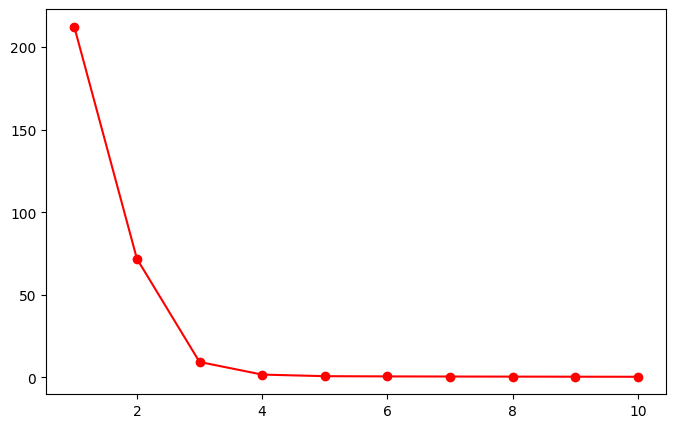

Inercia 2356.076252316473


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx", header = 1)
df1 = df.copy()
df1 = df[['Circuito', 'Nombre del contratista ', 'Horas', 'Número de instalación', 'Barrio', "Nombre del contratista "]]
df1= df1.dropna()
from sklearn.preprocessing import OneHotEncoder
df1["Horas"] = df1["Horas"].astype(float)
encoder = OneHotEncoder()
X4 =encoder.fit_transform(df1[["Circuito", "Barrio","Horas"]])

Kmeans = KMeans(n_clusters = 4 ,init="k-means++", n_init = 10, random_state = 42)
# Se ajusta el modelo Kmeans a los datos de X
Kmeans.fit(X4)
# Se muestran los centroides
centroids = Kmeans.cluster_centers_
# Se muestra las predicciones para definir a qué cluster pertenece cada muestra en el conjunto de los datos X
labels = Kmeans.predict(X4)
svd = TruncatedSVD(n_components=2)
centroids1 = Kmeans.cluster_centers_
X_ = svd.fit_transform(X4)
ssd = []


for k in range(1,11):
  km= KMeans(n_clusters = k, random_state= 42)
  km.fit(X_)
  ssd.append(km.inertia_)

plt.figure(figsize = (8,5))
plt.plot(range(1,11),ssd, marker="o", linestyle = "-", color = "r")
plt.show()

cent1 = svd.transform(centroids1)

df1["punto_1"] = labels

print(f"Inercia {Kmeans.inertia_}")

**Análisis de resultados:** Inicialmente se realizó el gráfico del codo para poder definir la cantidad ideal de n_clusters utilizados, luego se utiliza la métrica de la inertia para poder verificar la suma de todas las distancias en las carácteristicas de sus centroides, queriendo que sea un número bastante bajo, teniendo en cuenta esto se puede observar que hay un número de clusters bajo que son 4 y una incercial que también es baja, por lo tanto se puede decir que nuestro módelo tiene una buena forma.

**Posible solución:** Dado que tenemos un gran resultado, es posible que lo ideal es dejarlo como está, pero podemos utilizar otras métricas para poder evaluar la que ya se obtuvo y con esto realizar una comparativa de carácteristicas y tener en cuenta en donde se realizó un fallo.

# **AGGLOMERATIVE CLUSTERING DENDOGRAMA**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 960
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Motivo                   953 non-null    object
 1   Municipio                953 non-null    object
 2   Horas                    953 non-null    object
 3   Número de instalación    953 non-null    object
 4   Impacto                  953 non-null    object
 5   Nombre del contratista   953 non-null    object
dtypes: object(6)
memory usage: 52.1+ KB


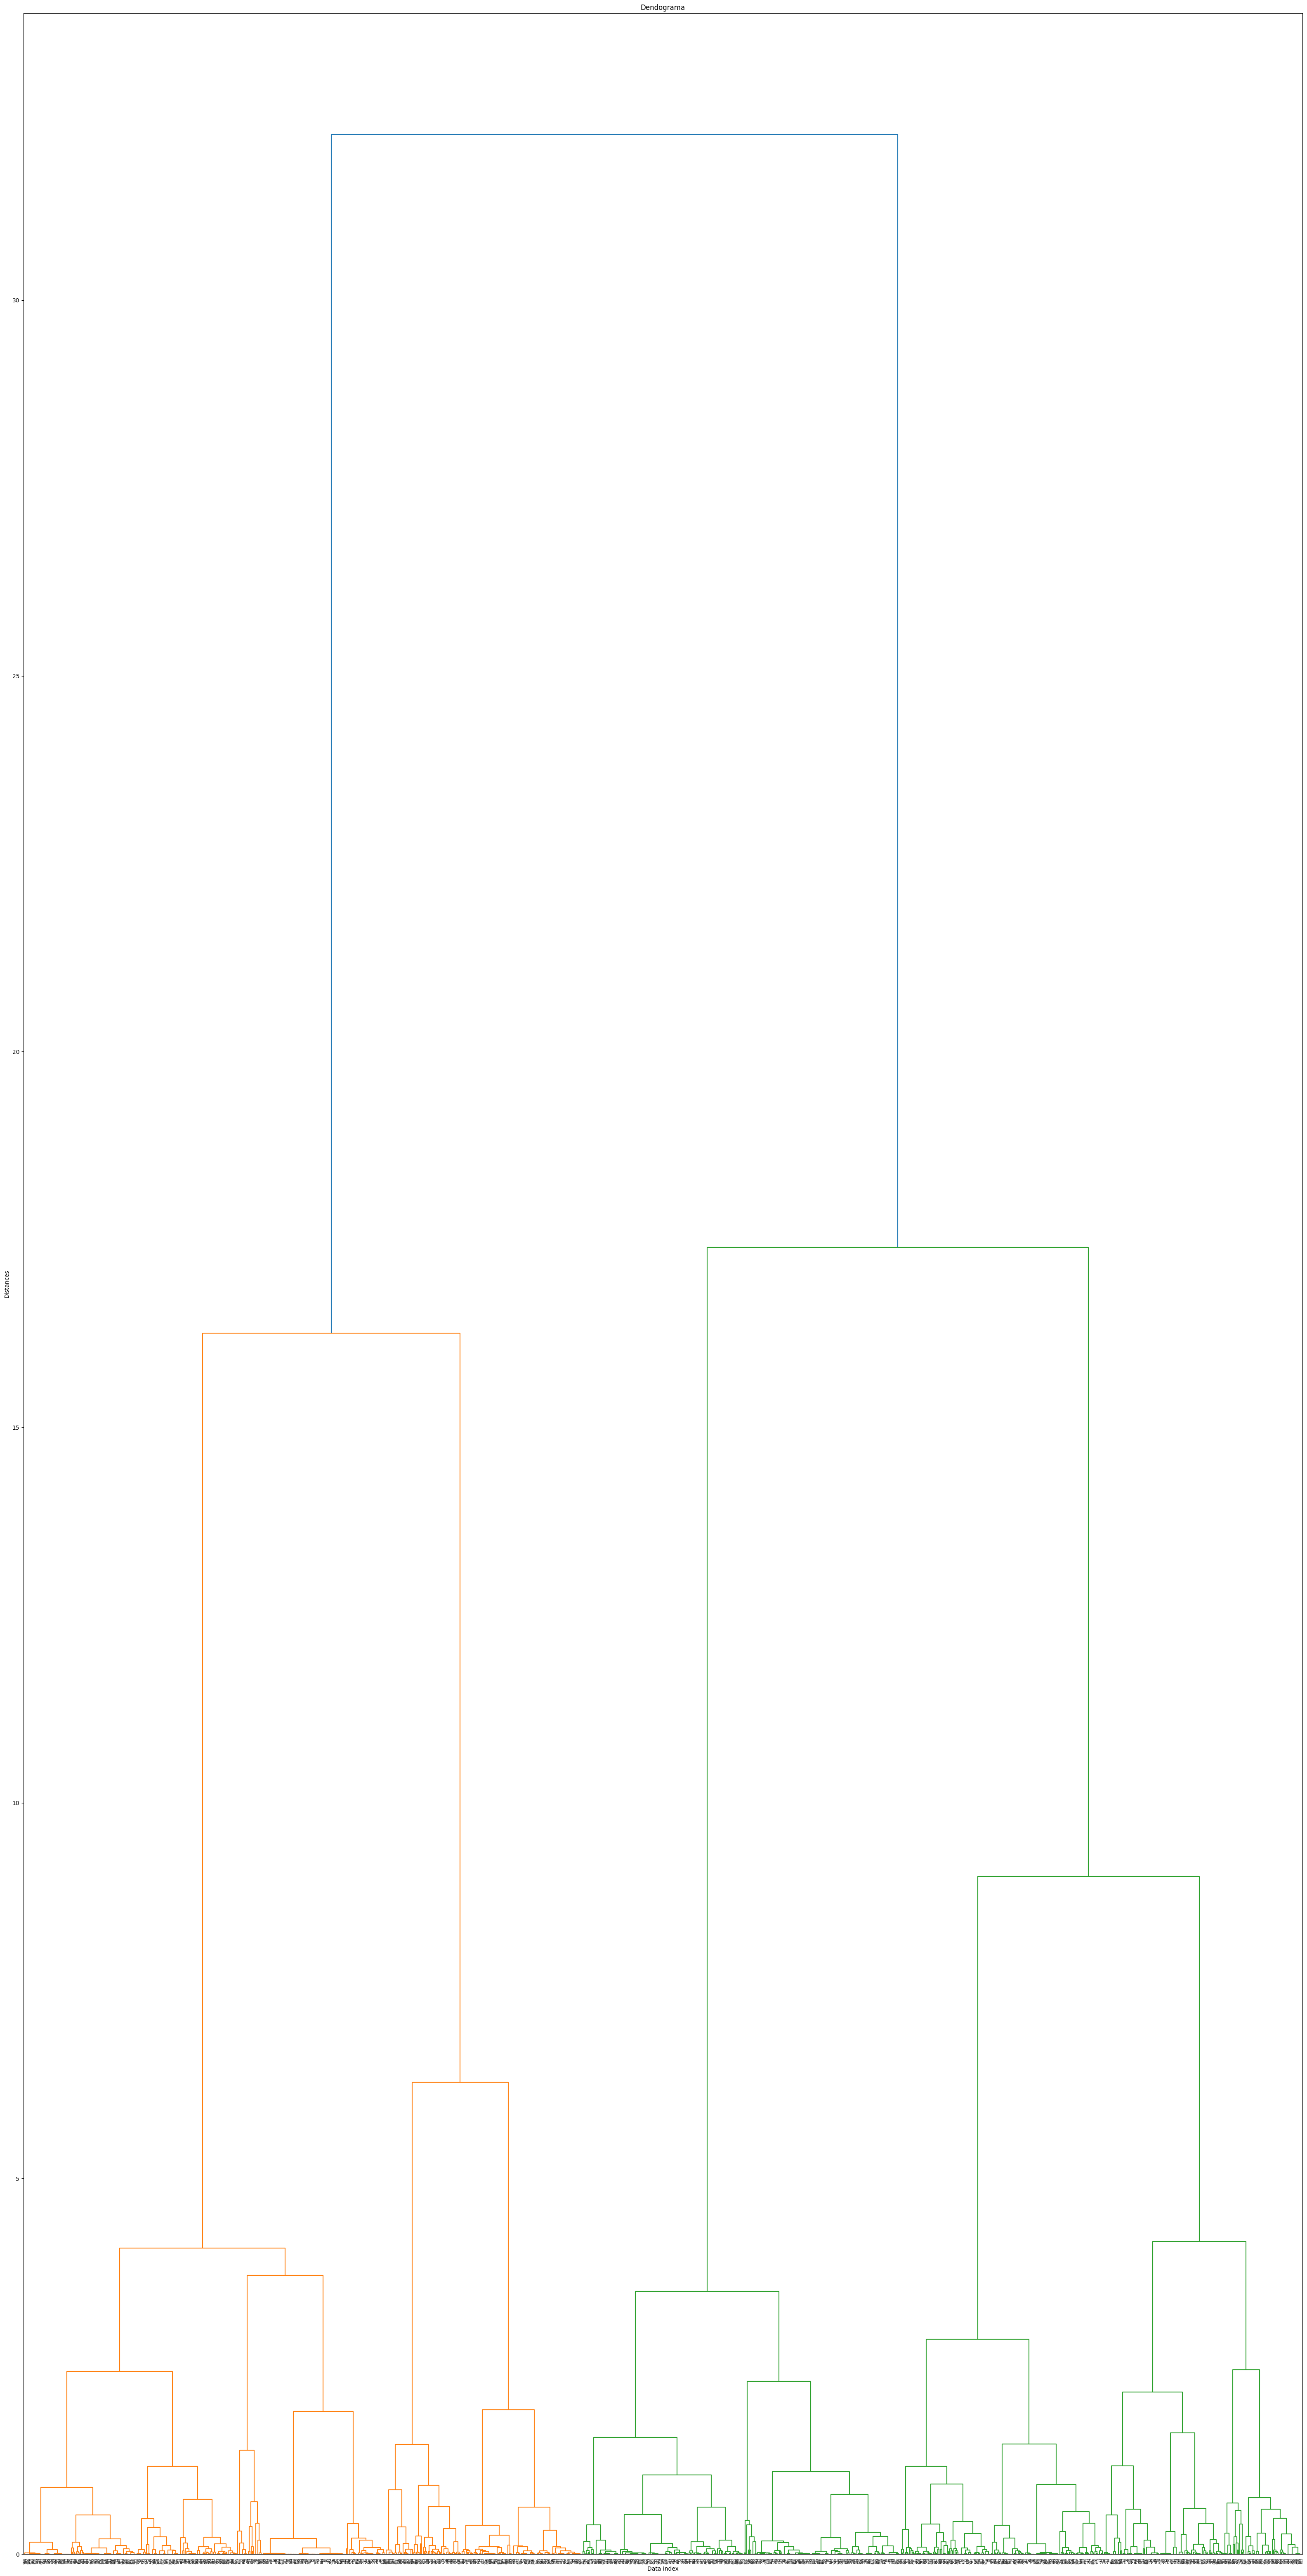

In [12]:
import pandas as pd
import numpy as np
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx", header=1)
df3 = df.copy()
df3 = df[["Motivo", "Municipio", "Horas", "Número de instalación", "Impacto", "Nombre del contratista "]]
df3 = df3.dropna()
df3.info()
df3["Horas"] = df3["Horas"].astype(float)
df3["Motivo"] = df3["Motivo"].apply(str)
df3["Número de instalación"] = df3["Número de instalación"].replace("-", np.nan)
df3 = df3.dropna()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X5 = encoder.fit_transform(df3[["Motivo","Municipio","Horas","Número de instalación","Impacto","Nombre del contratista "]])
X5 = X5.toarray()
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
aglome = AgglomerativeClustering(n_clusters=3, linkage = "complete")

labels = aglome.fit_predict(X5)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_1 = pca.fit_transform(X5)
# Se desarrolla el dendograma
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
linkage_matrix = linkage(X_1, "ward")
plt.figure(figsize=(40,80))
dendrogram(linkage_matrix, p=3)
plt.title("Dendograma")
plt.xlabel("Data index")
plt.ylabel("Distances")
plt.show()

**Análisis de resultados:** Al verificar la métrica de dendograma y trazar una linea horizontal sobre el valor de distancia de 17 y 19 aproximadamente, se definío que el valor ideal de clusters son 3, ya que como se pudo ver en el dendograma en ese punto se encuentran 3 lineas verticales.

**Posible solución:** Se podría analizar que pasa si se traza la línea horizontal un poco más abajo y ver el comportamiento de los clusters al ser gráficados, con esto podríamos observar visualmente si hay una correlación de unos con otros y poder determinar la mejor forma de capturar nuestros n_clusters que al fin y al cabo son la cantidad de clusters que se verán en nuestro gráfico.